In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Loan_Default.csv')

data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
categorical_cols = [cols for cols in data.columns if data[cols].dtype == 'object']
numerical_cols = [cols for cols in data.columns if data[cols].dtype in ['int64', 'float64']]

missing_categorical = [col for col in categorical_cols if data[col].isnull().any()]
missing_numeric = [col for col in numerical_cols if data[col].isnull().any()]


print(categorical_cols)
print('\n')
print(numerical_cols)
print('\n')
print(missing_categorical)
print('\n')
print(missing_numeric)

['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']


['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']


In [8]:
data[missing_numeric].head()

,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1
0,NaN,NaN,NaN,360.0,118000.0,1740.0,98.728814,45.0
1,NaN,NaN,NaN,360.0,NaN,4980.0,NaN,NaN
2,4.56,0.2000,595.0,360.0,508000.0,9480.0,80.019685,46.0
3,4.25,0.6810,NaN,360.0,658000.0,11880.0,69.376900,42.0
4,4.00,0.3042,0.0,360.0,758000.0,10440.0,91.886544,39.0


In [9]:
data[categorical_cols].head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [10]:
# replace nan values with mean

data = data.fillna(data.mean())

data[numerical_cols].isnull().sum()

C:\Users\BOB.T\AppData\Local\Temp/ipykernel_16280/1158699118.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


ID                      0
year                    0
loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64

In [11]:
data[categorical_cols].isnull().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
credit_type                     0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
Security_Type                   0
dtype: int64

In [12]:
for col in missing_categorical:
    data[col].fillna(data[col].mode()[0])

data.isnull().sum()

ID                              0
year                            0
loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV           

Text(0.5, 1.0, 'Class Distributions \n (0: No Default || 1: Default)')

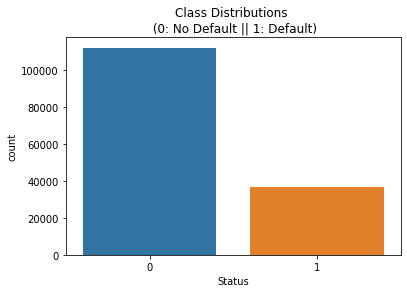

In [13]:
sns.countplot(x='Status', data=data)
plt.title('Class Distributions \n (0: No Default || 1: Default)')

In [14]:
print('No Default', round(data['Status'].value_counts()[0]/len(data)* 100,2), '% of the dataset')
print('Default', round(data['Status'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


No Default 75.36 % of the dataset
Default 24.64 % of the dataset


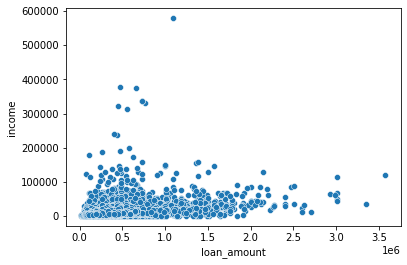

In [15]:
sns.scatterplot(x=data['loan_amount'], y=data['income'])
plt.show()

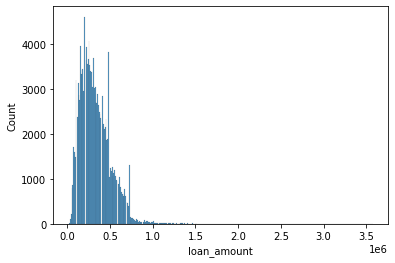

In [16]:
sns.histplot(data['loan_amount'])
plt.show()

In [17]:
data = data.drop(['ID','year'], axis=1)

data.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

## To Dos
1. Standardisation and normalisation if necessary
2. Label Encoding
3. Handling imbalance
4. Model Building
5. Model evaluation

In [18]:
# save columns
columns = data.columns

In [19]:
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

In [115]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_numerical = scaler.fit_transform(data[numerical_cols])

scaled_numerical



array([[-0.75      ,  0.        ,  0.        , ...,  1.19968624,
         1.        ,  0.66064251],
       [-0.375     ,  0.        ,  0.        , ..., -0.01306263,
         1.        ,  0.        ],
       [ 0.45833333,  1.02904839, -0.55109615, ...,  0.32642154,
         0.        ,  0.7515516 ],
       ...,
       [ 0.625     , -1.84095161, -0.82110755, ..., -0.54582278,
         0.        ,  1.02427887],
       [-0.41666667, -1.09095161,  0.32096771, ..., -0.10935513,
         0.        , -0.79390295],
       [ 0.45833333,  0.65904839,  2.15608743, ..., -0.00825479,
         0.        ,  0.56973342]])

In [116]:
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_cols)

scaled_numerical.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,-0.750000,0.000000,0.000000,0.000000,0.0,-1.096774,-0.959459,0.293532,1.199686,1.0,0.660643
1,-0.375000,0.000000,0.000000,0.000000,0.0,0.128689,-0.229730,-0.731343,-0.013063,1.0,0.000000
2,0.458333,1.029048,-0.551096,-0.996401,0.0,0.161290,0.783784,0.671642,0.326422,0.0,0.751552
3,0.666667,0.409048,0.545825,0.000000,0.0,0.645161,1.324324,-0.557214,-0.170340,0.0,0.387915
4,1.666667,-0.090952,-0.313468,-1.221823,0.0,0.967742,1.000000,-0.482587,0.880317,0.0,0.115188


## handling categorical values

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_categorical = encoder.fit_transform(data[categorical_cols])

encoded_categorical

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [23]:
encoded_df = pd.DataFrame(encoded_categorical)

encoded_df.index = data.index

encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
new_data = pd.concat([scaled_numerical, encoded_df], axis=1)

new_data.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,55,56,57,58,59,60,61,62,63,64
0,-0.750000,0.000000,0.000000,0.000000,0.0,-1.096774,-0.959459,0.293532,1.199686,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.375000,0.000000,0.000000,0.000000,0.0,0.128689,-0.229730,-0.731343,-0.013063,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.458333,1.029048,-0.551096,-0.996401,0.0,0.161290,0.783784,0.671642,0.326422,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.666667,0.409048,0.545825,0.000000,0.0,0.645161,1.324324,-0.557214,-0.170340,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.666667,-0.090952,-0.313468,-1.221823,0.0,0.967742,1.000000,-0.482587,0.880317,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Workspace

### Changes I am suggesting

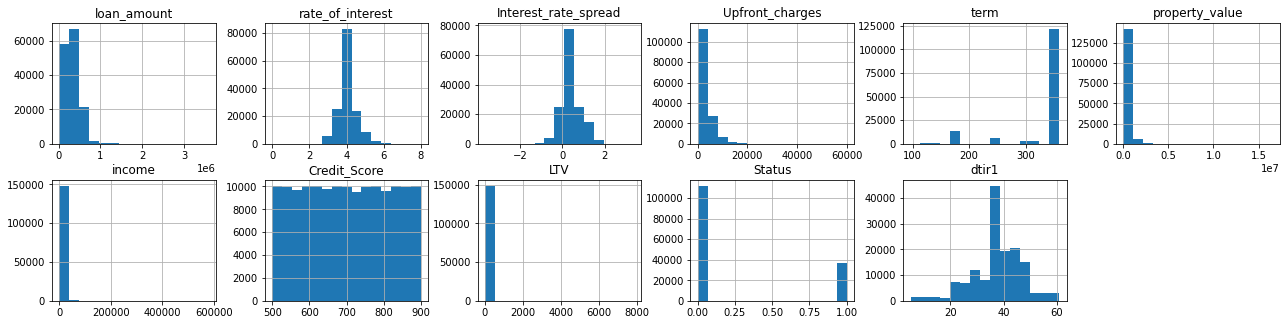

In [69]:
#Summary of the distribution of all numerical columns
data[numerical_cols].hist(bins=15, figsize=(22, 8), layout=(3,6));

In [26]:
#EASIER WAY TO FILTER NUMERICAL AND CATEGORICAL COLUMNS
numerical_cols = data.select_dtypes(include=np.number).columns

In [27]:
numerical_cols

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [28]:
categorical_cols = data.select_dtypes(exclude=np.number).columns

In [29]:
categorical_cols

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

## Pipelining

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [72]:
def feature_engineering(data):

  return data
engineered = FunctionTransformer(feature_engineering)

In [ ]:
scaler

In [126]:
transformer = ColumnTransformer([
    ('num',scaler,numerical_cols),
    ('cat',encoder,categorical_cols),
]
)
pipe = Pipeline([
    ('tranformer',transformer),
    ('engineered',engineered)
])


In [127]:
new_data = pd.DataFrame(pipe.fit_transform(data))

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [128]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.750000,0.000000,0.000000,0.000000,0.0,-1.096774,-0.959459,0.293532,1.199686,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.375000,0.000000,0.000000,0.000000,0.0,0.128689,-0.229730,-0.731343,-0.013063,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.458333,1.029048,-0.551096,-0.996401,0.0,0.161290,0.783784,0.671642,0.326422,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.666667,0.409048,0.545825,0.000000,0.0,0.645161,1.324324,-0.557214,-0.170340,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.666667,-0.090952,-0.313468,-1.221823,0.0,0.967742,1.000000,-0.482587,0.880317,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0.583333,-1.840952,-0.420879,2.551626,-180.0,0.483871,0.418919,-0.199005,-0.057577,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
148666,1.208333,2.289048,0.941264,-1.221823,0.0,1.064516,0.256757,-0.646766,0.065468,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
148667,0.625000,-1.840952,-0.821108,-0.757098,-180.0,0.870968,0.202703,0.014925,-0.545823,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
148668,-0.416667,-1.090952,0.320968,0.416115,-180.0,-0.580645,0.256757,0.189055,-0.109355,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [35]:
new_data[9].equals(data['Status'].astype('float64'))

True

In [36]:
#check count
print('No Defaulters',new_data[9].value_counts()[0], ' of the dataset')
print('Defaulters', new_data[9].value_counts()[1] , ' of the dataset')

No Defaulters 112031  of the dataset
Defaulters 36639  of the dataset


# Handle imbalance

In [37]:
shuffled_df = new_data.sample(frac=1, random_state=4)

defaulters = shuffled_df.loc[shuffled_df[9] == 1.0]

#random select 492 observations from non-fraud(majority class)
non_defaulters = shuffled_df.loc[shuffled_df[9] == 0.0].sample(n=36639, random_state=42)

#concatenate both frames again
handled_df = pd.concat([defaulters, non_defaulters])

handled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
122907,-0.750000,0.0,0.0,0.0,-264.0,-1.096774,-0.243243,0.980100,1.199686,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
37852,0.791667,0.0,0.0,0.0,0.0,0.709677,1.202703,-0.532338,-0.059332,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
33545,0.708333,0.0,0.0,0.0,0.0,0.128689,0.716216,0.860697,-0.013063,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
18658,-0.416667,0.0,0.0,0.0,0.0,-0.741935,-0.405405,-0.786070,0.614156,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
100675,-0.458333,0.0,0.0,0.0,-60.0,0.128689,-0.513514,0.422886,-0.013063,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [38]:
print('No Defaulters',handled_df[9].value_counts()[0], ' of the dataset')
print('Defaulters', handled_df[9].value_counts()[1] , ' of the dataset')

No Defaulters 36639  of the dataset
Defaulters 36639  of the dataset


# Modelling And Evaluation

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

y = handled_df[9]
X = handled_df.drop(9, axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
def KNN():
    model = KNeighborsClassifier()
    params={'n_neighbors':[3,5,10,15],
            'leaf_size':[30,40,50]
           }
    return model, params

In [47]:
def logistic():
    model = LogisticRegression()
    params = {'C':[1,10,20],
             }
    return model, params

In [48]:
def RandomForest():
    model = RandomForestClassifier()
    params = {'n_estimators':[50,100,200],
              'criterion':['gini','entropy','log_loss'],
              'max_depth':[2,4,6,8,10],
              'max_features': ["auto", "sqrt", "log2"]
             }
    return model, params

In [49]:
def run_models(models_list):
    models={}
    best_score = 0
    best_model = ''
    for func in model_list:
        model,params = func()
        #Randomized search
        search = RandomizedSearchCV(model,param_distributions=params,cv=4,n_iter=5)
        Model = search.fit(x_train,y_train)
        if Model.best_score_ > best_score:
            best_score = Model.best_score_
            best_model = Model
        models[model.__class__.__name__] = Model.best_score_
    print('Training Finished!')
    print('Training summary:\n\n'.upper())
    print(models,'\n\n')
    print('The best score is: '.upper(), best_score)
    return best_model

In [50]:
model_list = [RandomForest,logistic,KNN]
model = run_models(model_list)

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Training Finished!
TRAINING SUMMARY:


{'RandomForestClassifier': 1.0, 'LogisticRegression': 0.7749054755741703, 'KNeighborsClassifier': 0.9122313845661665} 


THE BEST SCORE IS:  1.0


In [132]:
from sklearn.metrics import classification_report, accuracy_score, recall_score,f1_score,roc_curve, confusion_matrix,RocCurveDisplay


y_pred = model.predict(x_test)

#evaluate model

print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11064
         1.0       1.00      1.00      1.00     10920

    accuracy                           1.00     21984
   macro avg       1.00      1.00      1.00     21984
weighted avg       1.00      1.00      1.00     21984



In [53]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion_matrix:\n', conf_mat)

Confusion_matrix:
 [[11064     0]
 [    0 10920]]


Text(33.0, 0.5, 'Actual')

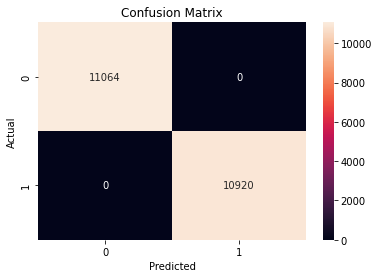

In [54]:
sns.heatmap(conf_mat, fmt=".0f", annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [55]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


# To Dos
1. Encode Ordinal Columns
2. Experiment on ensembling (imbalance fix)
3. Gender not available fix
4. handling outliers
5. dimensionality reduction
6. feature engineering

# Work Split

1. EDA - Elias
2. Data visualisation - Kekeli
3. Data Preprocessing - Ernest
4. Model building - Osman

<AxesSubplot:>

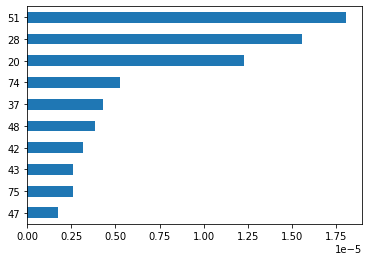

In [65]:
from matplotlib.pyplot import figure

feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x_train.columns).sort_values(ascending = True)
feat_importances[:10].plot(kind = 'barh')

ROC CURVE


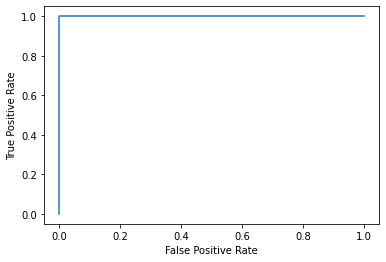

In [133]:
print('ROC CURVE')
fpr, tpr, _ = roc_curve(y_test, y_pred)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()